1. Practice Question on Linear Regression (California Housing Dataset)

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [199]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()

In [200]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [201]:
dataset = pd.DataFrame(df.data)

In [202]:
print(df['target'])

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [203]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [204]:
dataset.columns = df.feature_names

In [205]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Independent Features and Dependent features

In [206]:
X = dataset
y = df.target

In [207]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30, random_state=42)

In [209]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


Standardizing the dataset

In [210]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [211]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [212]:
from sklearn.linear_model import LinearRegression

##Cross validation 

from sklearn.model_selection import cross_val_score

In [213]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [214]:
mse = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error', cv=10)

In [215]:
np.mean(mse)

-0.5257104326777

In [216]:
##prediction 
reg_pred = regression.predict(X_test)

In [217]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

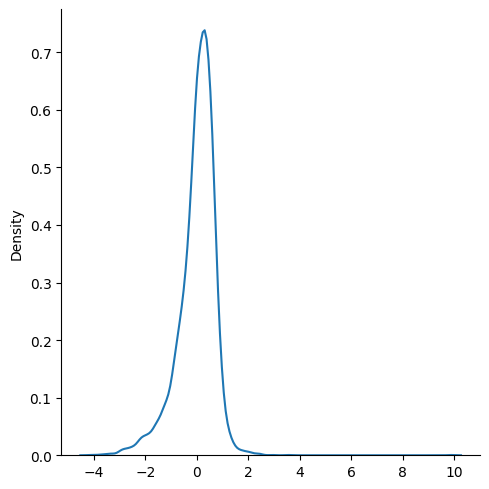

In [218]:
import seaborn as sns
sns.displot(reg_pred - y_test,kind = 'kde')

In [219]:
from sklearn.metrics import r2_score

In [220]:
score = r2_score(reg_pred,y_test)

In [221]:
score

0.3451339380943984

2. Linear Regression + Ridge and Lasso

In [222]:
from sklearn.datasets import load_diabetes
%matplotlib inline

In [223]:
df = load_diabetes()

In [224]:
dataset = pd.DataFrame(df.data)

In [225]:
dataset

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


age: Age in years
sex: Gender of the patient
bmi: Body mass index
bp: Average blood pressure
s1: Total serum cholesterol (tc)
s2: Low-density lipoproteins (ldl)
s3: High-density lipoproteins (hdl)
s4: Total cholesterol / HDL (tch)
s5: Possibly log of serum triglycerides level (ltg)
s6: Blood sugar level (glu)

In [226]:
dataset.columns = df.feature_names

In [227]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [228]:
dataset['Progression'] = df.target

In [229]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Splitting the Dataset into Dependent and Independent Feature 

In [230]:
X = dataset.iloc[:,:-1]##independent feature
y = dataset.iloc[:,-1]##dependent feature

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
lin_reg = LinearRegression()
nmse = cross_val_score(lin_reg,X,y,scoring = 'neg_mean_squared_error', cv=5)
print(np.mean(nmse))

-2993.0813104693307


In [232]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have model predictions from cross-validation
from sklearn.model_selection import cross_val_predict

# Get cross-validated predictions
y_pred = cross_val_predict(lin_reg, X, y, cv=5)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

Mean Squared Error: 2992.679946593995
R-squared: 0.49532242216821853


In [233]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30, random_state=42)

In [234]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [235]:
lin_reg.score(X_test, y_test)

0.4772897164322617

In [236]:
reg_pred = lin_reg.predict(X_test)

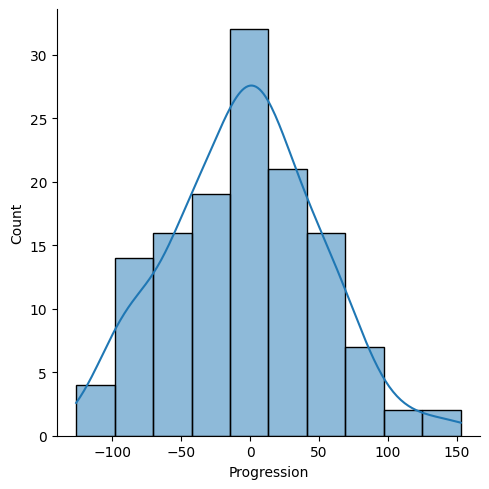

In [237]:
import seaborn as sns
sns.displot(reg_pred - y_test,kde=True)

Ridge Regression

In [238]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

params = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, params, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [239]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.001}
-2993.0661546538704


Lasso Regression

In [240]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

params = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X,y)

C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.122e+05, tolerance: 2.153e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.004e+05, tolerance: 2.044e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [241]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-2993.0813092745934


LINEAR REGRESSION SIMPLE EXAMPLE

In [242]:
data = pd.read_csv("Walmart_Sales.csv")

In [243]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [245]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [246]:
import statsmodels.api as sm

In [247]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Filter the data for a specific range of dates
start_date = '2010-02-05'
end_date = '2010-03-05'
filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
filtered_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6292,45,2010-02-05,890689.51,0,27.31,2.784,181.871190,8.992
6293,45,2010-02-12,656988.64,1,27.73,2.773,181.982317,8.992
6294,45,2010-02-19,841264.04,0,31.27,2.745,182.034782,8.992
6295,45,2010-02-26,741891.65,0,34.89,2.754,182.077469,8.992


<function matplotlib.pyplot.show(close=None, block=None)>

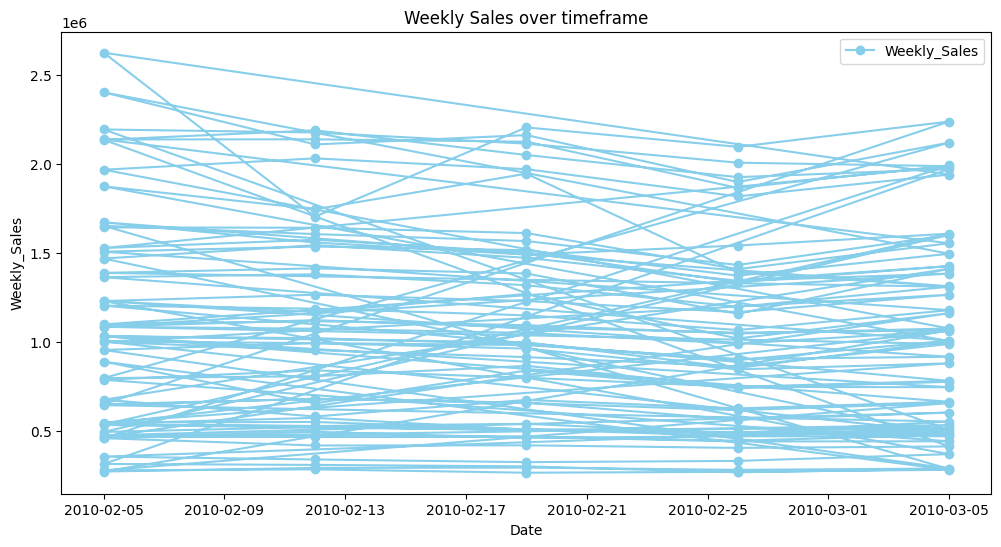

In [248]:
#Plotting the trend of weekly sales over time to observe any seasonality or trends.

plt.figure(figsize=(12,6))
plt.plot(filtered_data['Date'], filtered_data["Weekly_Sales"],  label = "Weekly_Sales", color = 'skyblue', linestyle = '-', marker = 'o')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.title('Weekly Sales over timeframe')
plt.legend()
plt.show

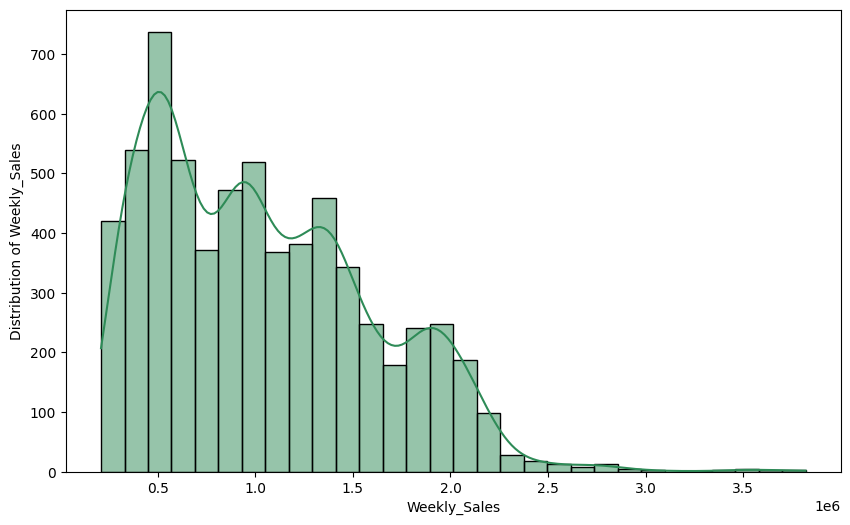

In [249]:
plt.figure(figsize = (10,6))
sns.histplot(data['Weekly_Sales'], color = 'seagreen', bins = 30, kde = True)
plt.xlabel('Weekly_Sales')
plt.ylabel('Distribution of Weekly_Sales')
plt.show()

Logistic Regression

In [250]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
from sklearn.datasets import  load_breast_cancer

In [251]:
df = load_breast_cancer()
X = pd.DataFrame(df['data'], columns = df["feature_names"])
y = pd.DataFrame(df['target'], columns = ["Target"])

In [252]:
print(X.head())
print(y.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [253]:
#Checking whether the 'y' Column is balanced or imbalanced.
y['Target'].value_counts()

Target
1    357
0    212
Name: count, dtype: int64

In [254]:
#Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [255]:
params = [{'C' : [1,5,10]}, {'max_iter' : [100,150]}]

In [256]:
model1 = LogisticRegression(C=100, max_iter=100)
model = GridSearchCV(model1, param_grid=params, scoring='f1', cv=5)
model.fit(X_train,y_train)


C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KIIT\AppData\Local\Pa

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [257]:
model.best_params_

{'max_iter': 150}

In [258]:
model.best_score_

0.9596788341822297

In [259]:
y_pred = model.predict(X_test)

Confusion Matrix

In [260]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
confusion_matrix(y_test,y_pred)

array([[ 63,   4],
       [  4, 117]], dtype=int64)

In [261]:
accuracy_score(y_test, y_pred)

0.9574468085106383

In [262]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.97      0.97      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

